[SHAP (SHapley Additive exPlanations)](https://github.com/slundberg/shap?fbclid=IwAR3OAE-htr7uu-cstk6pFuFMRQfTrZM7_51mPxmz2EXe1KzBf38Kp0cagXY) is a game theoretic approach to explain the output of any machine learning model. It connects optimal credit allocation with local explanations using the classic Shapley values from game theory and their related extensions. 

All charts of shap use shape value and fearture value since SHAP values represent a feature's responsibility for a change in the model output, SHAP values usually use with regression or probability output in classification (countinuos values).The SHAP values provide two great advantages come along with 3 main types of charts (bar, waterfall and scatter plot):
1. Global interpretability — the SHAP values can show how much each predictor contributes, either positively or negatively, to the target variable. This is like the variable importance plot but it is able to show the positive or negative relationship for each variable with the target
2. Local interpretability — each observation gets its own set of SHAP values. Traditional variable importance algorithms only show the results across the entire population but not on each individual case. The local interpretability enables us to pinpoint and contrast the impacts of the factors

SHAP has total 5 explainers out of which 2 are frequently used: *treeExplainer* and *kernerExplainer*. Others is using for text, image and deep learning. The difference between these explainers is the algorithm used to compute the SHAP values. But there is 1 module called *Explainer* - it can be used with any model but taking long time to print the result. To optimize the speed, use the right explainer with the model.

# 1. Explaner

In [3]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import xgboost
import shap
shap.initjs()
# train an XGBoost model
X, y = shap.datasets.boston()
model = xgboost.XGBRegressor().fit(X, y)

In [6]:
# train an XGBoost model
X, y = shap.datasets.boston()
model = xgboost.XGBRegressor().fit(X, y)
explainer = shap.Explainer(model)
shap_values = explainer(X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


#### Feature important

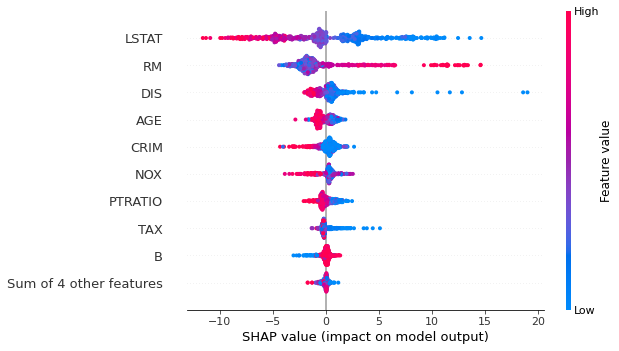

In [20]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

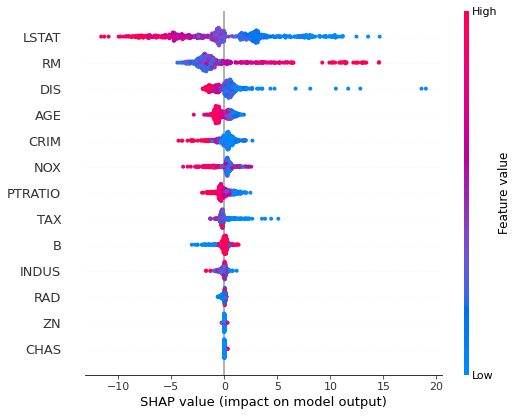

In [21]:
# another function of beewarm
shap.summary_plot(shap_values, X)

The plot above sorts features by the sum of SHAP value magnitudes over all samples, and uses SHAP values to show the distribution of the impacts each feature has on the model output. The color represents the feature value (red high, blue low). This reveals for example that a high LSTAT (% lower status of the population) lowers the predicted home price.

Below is the chart calculate mean value of shap values and represent in bar chart

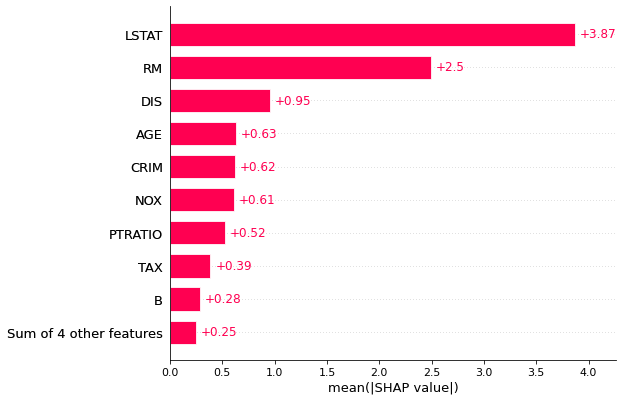

In [9]:
shap.plots.bar(shap_values)

#### Contributed in prediction

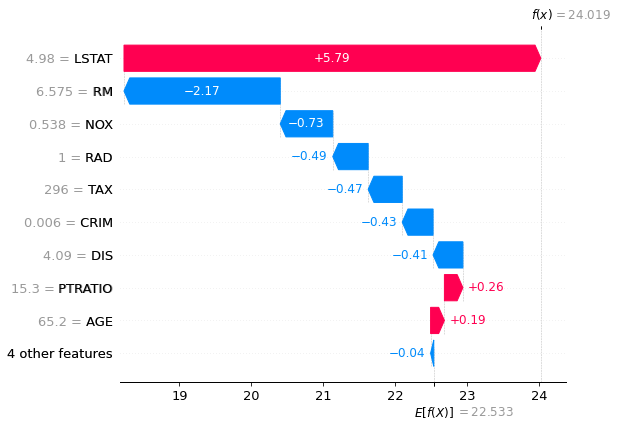

In [7]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

Waterfall chart show the distributed of each feature to the prediction, features pushing the prediction higher are shown in red, lower are shown in blue. With base values of model is $E[f(X)]$ and the prediction is $f(X)$ 

In [10]:
# visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[0])

In [11]:
# visualize all the training set predictions
shap.plots.force(shap_values)

#### Dependence plot


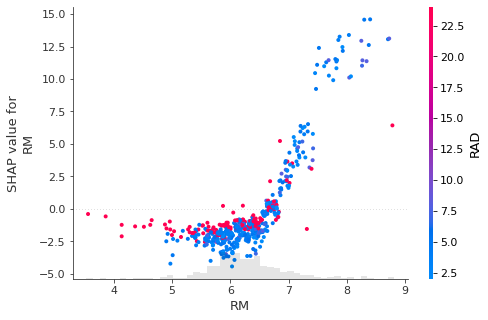

In [12]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:,"RM"], color=shap_values)

The chart above show that higher RM come with higher in house price prediction - especially with low RAD value, if RAD is high, RM has little effect on prediction

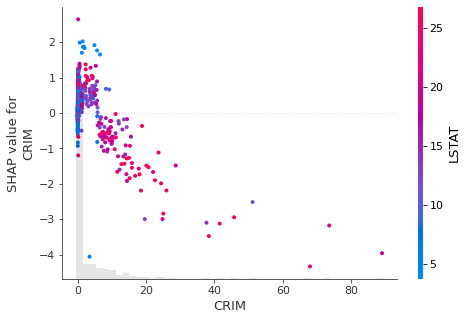

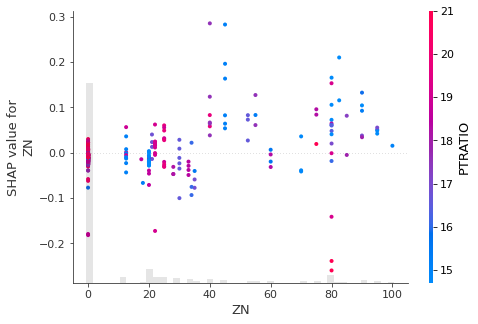

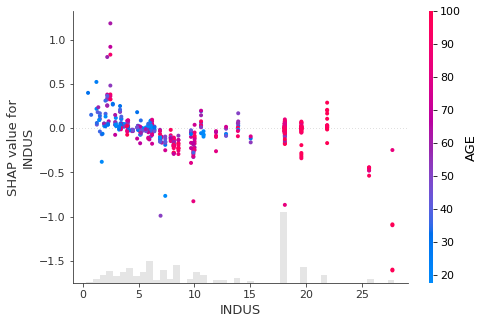

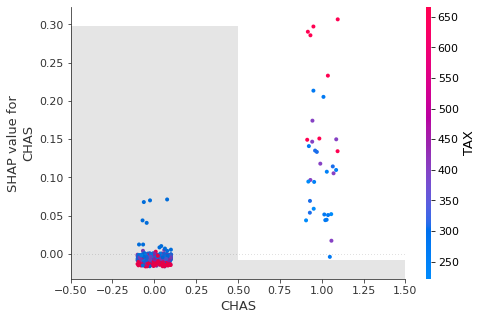

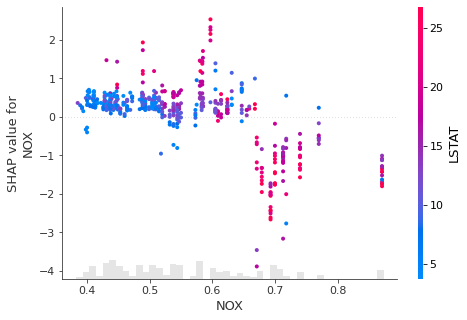

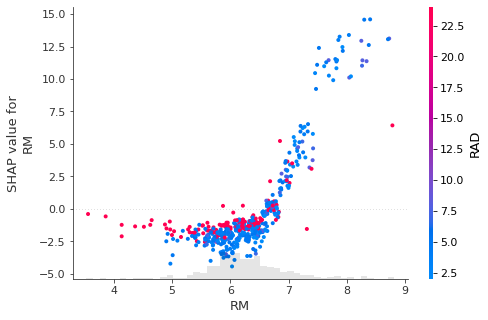

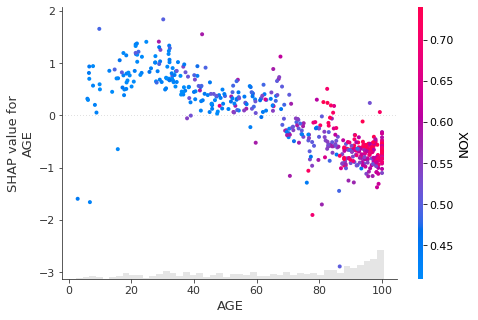

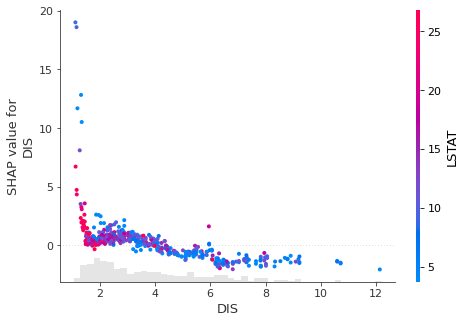

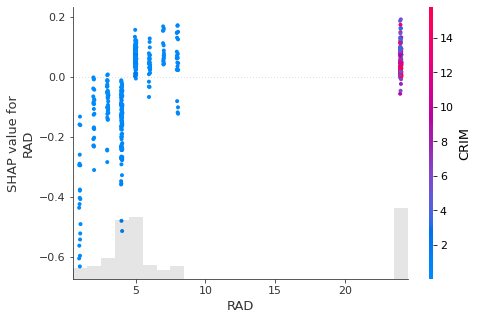

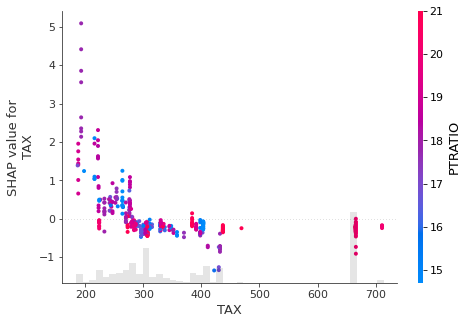

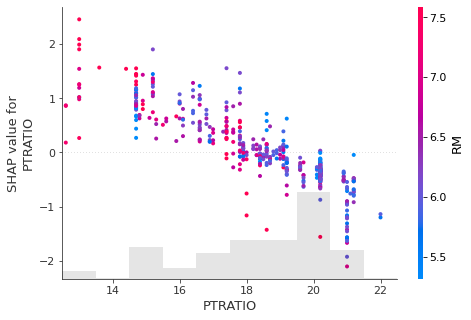

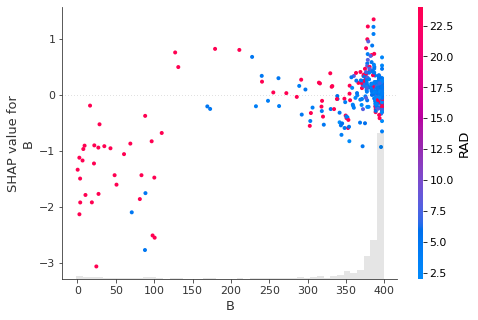

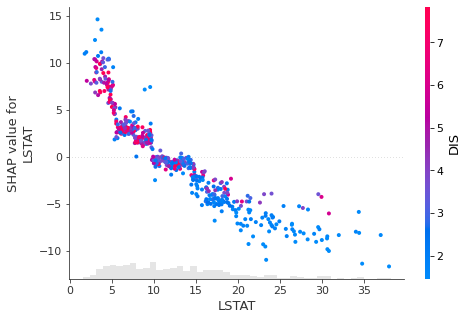

In [19]:
col = X.columns
for i in col:
    shap.plots.scatter(shap_values[:,i], color=shap_values)

# 2. KernelExplainer

KernelExplainer works the same way with Explainer - it can explain any model output. Below is the example in classification problem

In [57]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import xgboost
import shap
shap.initjs()

In [2]:
X_train,X_test,Y_train,Y_test = train_test_split(*shap.datasets.iris(), test_size=0.2, random_state=0)
svm = sklearn.svm.SVC(kernel='rbf', probability=True)
svm.fit(X_train, Y_train)

SVC(probability=True)

In [32]:
# use Kernel SHAP to explain test set predictions
explainer = shap.KernelExplainer(model=svm.predict_proba, data=X_train, link="logit")
shap_values = explainer.shap_values(X_test, nsamples=100)

Using 120 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/30 [00:00<?, ?it/s]

#### Feature importance

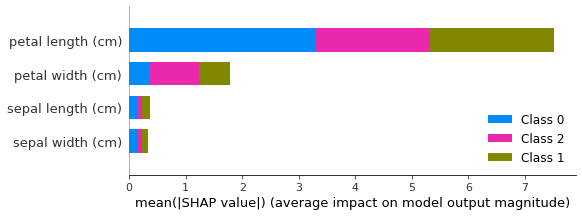

In [61]:
# for all instance
shap.summary_plot(shap_values, X_test)

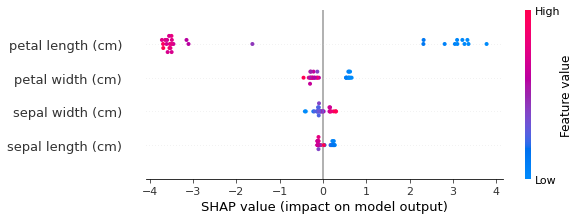

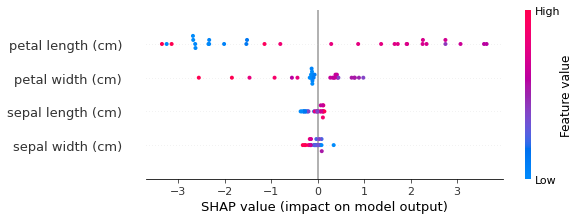

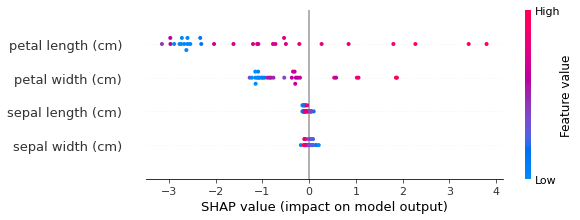

In [66]:
# for each class
for i in range(len(shap_values)):
    shap.summary_plot(shap_values[i], X_test)

####  Contributed in prediction

In [58]:
# plot the SHAP values for the Setosa output of the first instance
shap.force_plot(
        base_value=explainer.expected_value[0], 
        shap_values=shap_values[0][0,:], 
        features=X_test.iloc[0,:], 
        link="logit")

In [56]:
# plot the SHAP values for the Virginia output of the first instance
shap.force_plot(
        base_value=explainer.expected_value[2], 
        shap_values=shap_values[2][0,:], 
        features=X_test.iloc[0,:], 
        link="logit")

Blue color indicates that the feature decreased the probability and the red color indicates that the feature value increased the probability.

In [30]:
# plot the SHAP values for the Setosa output of all instances
shap.force_plot(
    base_value=explainer.expected_value[0], 
    shap_values=shap_values[0], 
    features=X_test, 
    link="logit"
)

#### Dependence plot

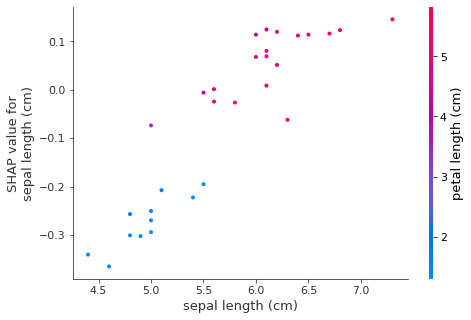

In [71]:
shap.dependence_plot(
    ind='sepal length (cm)',
    shap_values=shap_values[1],
    features=X_test)

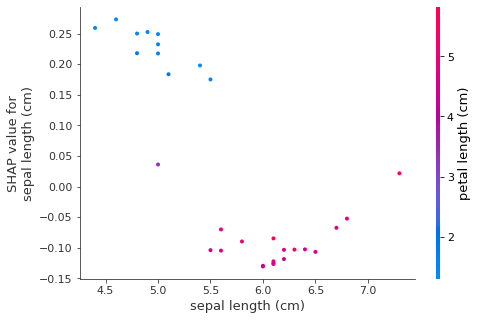

In [73]:
shap.dependence_plot(
    ind='sepal length (cm)',
    shap_values=shap_values[0],
    features=X_test)

# 3. TreeExplaner

TreeExplainer is used for tree-based model. The functions used in TreeExplainer are the same as KernelExplainer. Below is the example in regression problem

In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import xgboost
import shap
shap.initjs()

In [2]:
X,y = shap.datasets.nhanesi()
X_display,y_display = shap.datasets.nhanesi(display=True) # human readable feature values

xgb_full = xgboost.DMatrix(X, label=y)

# create a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
xgb_train = xgboost.DMatrix(X_train, label=y_train)
xgb_test = xgboost.DMatrix(X_test, label=y_test)

In [3]:
# use validation set to choose # of trees
params = {
    "eta": 0.002,
    "max_depth": 3,
    "objective": "survival:cox",
    "subsample": 0.5
}
model_train = xgboost.train(params, xgb_train, 10000, evals = [(xgb_test, "test")], verbose_eval=1000)

[0]	test-cox-nloglik:7.67904
[1000]	test-cox-nloglik:7.03036
[2000]	test-cox-nloglik:6.97619
[3000]	test-cox-nloglik:6.96359
[4000]	test-cox-nloglik:6.96469
[5000]	test-cox-nloglik:6.96847
[6000]	test-cox-nloglik:6.97303
[7000]	test-cox-nloglik:6.97672
[8000]	test-cox-nloglik:6.97961
[9000]	test-cox-nloglik:6.98316
[9999]	test-cox-nloglik:6.98691


In [4]:
# train final model on the full data set
params = {
    "eta": 0.002,
    "max_depth": 3, 
    "objective": "survival:cox",
    "subsample": 0.5
}
model = xgboost.train(params, xgb_full, 5000, evals = [(xgb_full, "test")], verbose_eval=1000)

[0]	test-cox-nloglik:9.28408
[1000]	test-cox-nloglik:8.60854
[2000]	test-cox-nloglik:8.53116
[3000]	test-cox-nloglik:8.49403
[4000]	test-cox-nloglik:8.47058
[4999]	test-cox-nloglik:8.45255


In [5]:
shap_values = shap.TreeExplainer(model).shap_values(X)

#### Feature importance

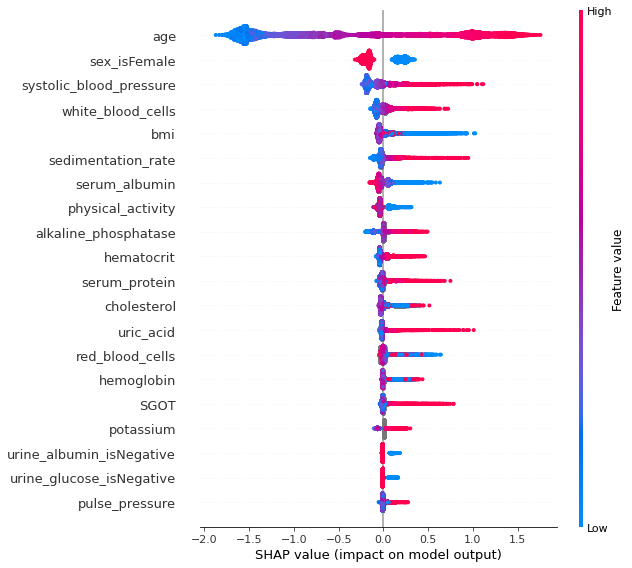

In [6]:
shap.summary_plot(shap_values, X)

####  Dependence plot

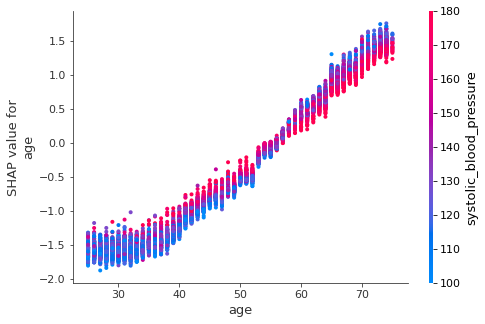

In [9]:
shap.dependence_plot(ind="age", shap_values=shap_values, features=X)

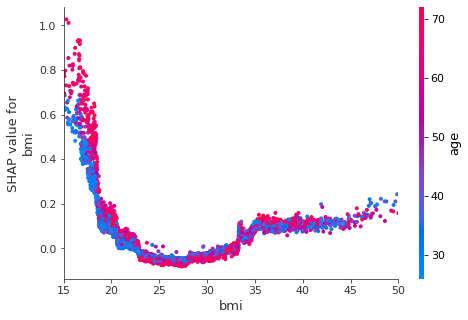

In [12]:
shap.dependence_plot("bmi", shap_values, X, display_features=X_display, show=False)
plt.xlim(15,50)
plt.show()

# 4. LinearExplaner 

# 5. GradientExplaner 

# 6. DeepExplaner